**РЫНОК ЗАВЕДЕНИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ МОСКВЫ**

### Описание проекта

Решено открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов? Исследуем рынок. У нас есть открытые данные о заведениях общественного питания в Москве.


#### Оглавление

- Подготовка

- Загрузка библиотек
 
- Загрузка датасета и проверка его на наличие дубликатов, пропусков и соответствие типам данных, а также правильность выгрузки

- Анализ данных:
 - Исследуем соотношение видов объектов общественного питания по количеству
 - Исследуем соотношение сетевых и несетевых заведений по количеству
 - Определим для какого вида объекта общественного питания характерно сетевое распространение
 - Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
 - Для каждого вида объекта общественного питания опишите среднее количество посадочных мест.     - Какой вид предоставляет в среднем самое большое количество посадочных мест?
 - Выделим в отдельный столбец информацию об улице из столбца address
 - Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?
 - Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.
 - Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.

- Вывод:
 - Сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.

#### Описание даннных

Таблица **rest_data:**

**id** — идентификатор объекта;

**object_name** — название объекта общественного питания;

**chain** — сетевой ресторан;

**object_type** — тип объекта общественного питания;

**address** — адрес;

**number** — количество посадочных мест.

### Шаг №1. Загрузка данных и подготовка их к анализу

*Загрузим данные о заведениях общественного питания Москвы. Убедиимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их*

In [1]:
!pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38531 sha256=2836659f6b1d636a5b3c4b63744d198cba98192a01b964c182077b92b4442bb0
  Stored in directory: /home/jovyan/.cache/pip/wheels/b6/23/aa/a130b53682531f8382dd06f2000001225bea7b56a99c516f87
Successfully built googlemaps


In [2]:
!pip install geocoder

     |████████████████████████████████| 98 kB 988 kB/s eta 0:00:01
     |████████████████████████████████| 829 kB 5.5 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=67241757334d551203d6d3ea884f16591d7a9a1d6866a7741d2bb8c0069d04da
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


In [3]:
!pip install plotly

In [4]:
!pip install folium

In [5]:
#импортируем библиотеки
import googlemaps
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import plotly.express as px
import json
import requests

import folium
import math
from scipy import stats
import re

from pymystem3 import Mystem
from collections import Counter

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

from io import BytesIO
import requests

warnings.filterwarnings('ignore')

In [6]:
# Загрузим данные
data = pd.read_csv('/datasets/rest_data.csv', sep=',')

In [7]:
# Изучим инвормацию о df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
# Выведем первые 5 строк таблицы
data.head()

id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

Датафрейм с заказами состоит из 15366 строк и 5 колонок: id типа int64, number типа int64, object_name типа object, chain типа object, object_type типа object, address типа object. 

In [9]:
# Приведем object_name и address к нижнему регистру
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()
data.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

In [10]:
# Переименуем Chain в более понятные значения: Сетевое/Несетевое.
d = {'да': 'Сетевое', 'нет': 'Несетевое'}

data['chain'] = data['chain'].map(d)
data.head()

id             object_name      chain object_type  \
0  151635                 сметана  Несетевое        кафе   
1   77874                  родник  Несетевое        кафе   
2   24309         кафе «академия»  Несетевое        кафе   
3   21894              пиццетория    Сетевое        кафе   
4  119365  кафе «вишневая метель»  Несетевое        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

*Проведем необходимые проверки на дубликаты*

In [11]:
data[data.duplicated()]

Empty DataFrame
Columns: [id, object_name, chain, object_type, address, number]
Index: []

Полных дубликатов строк нет.

In [12]:
data[data.duplicated(['object_name', 'object_type', 'address'])].head(10)

id                           object_name      chain object_type  \
115    28614  комбинат питания мгту им.н.э.баумана  Несетевое       буфет   
580   149205                  общественное питание  Несетевое        кафе   
581   149131                  общественное питание  Несетевое        кафе   
1409  151267                              альфорно  Несетевое        кафе   
2375   28604  комбинат питания мгту им.н.э.баумана  Несетевое    столовая   
2379   28609  комбинат питания мгту им.н.э.баумана  Несетевое       буфет   
2380   28610  комбинат питания мгту им.н.э.баумана  Несетевое    столовая   
2381   28611  комбинат питания мгту им.н.э.баумана  Несетевое    столовая   
2382   28615  комбинат питания мгту им.н.э.баумана  Несетевое    столовая   
2383   28616  комбинат питания мгту им.н.э.баумана  Несетевое  закусочная   

                                                address  number  
115        город москва, бригадирский переулок, дом 3-5      12  
580             город москва, павелецкая площадь, дом 1      35  
581             город москва, павелецкая площадь, дом 1      39  
1409         город москва, город зеленоград, корпус 438      45  
2375  город москва, 2-я бауманская улица, дом 5, стр...     150  
2379  город москва, 2-я бауманская улица, дом 5, стр...      30  
2380  город москва, 2-я бауманская улица, дом 5, стр...     200  
2381  город москва, 2-я бауманская улица, дом 5, стр...     100  
2382  город москва, 2-я бауманская улица, дом 5, стр...     168  
2383  город москва, 2-я бауманская улица, дом 5, стр...      64

Видим, что у нас может быть несколько заведений в одном здании. Не будем считать их бликатами.

In [13]:
data[data.duplicated(['object_name', 'chain', 'object_type', 'address', 'number'])]

id                           object_name      chain  \
2381    28611  комбинат питания мгту им.н.э.баумана  Несетевое   
3397    71896               буфет «коникс-школьник»  Несетевое   
3481    20914                            буфет мади  Несетевое   
4431    23759     столовая гбоу города москвы № 384  Несетевое   
4537    23391    столовая «комбинат питания космос»  Несетевое   
...       ...                                   ...        ...   
14578  222932                           старый баку  Несетевое   
14596  204947                  буфет при кинотеатре  Несетевое   
14844  219518                            sushi-make  Несетевое   
15173  218542                          кофе с собой    Сетевое   
15217  214146                            макдоналдс    Сетевое   

                             object_type  \
2381                            столовая   
3397                               буфет   
3481                               буфет   
4431                               буфет   
4537                            столовая   
...                                  ...   
14578                               кафе   
14596                              буфет   
14844  предприятие быстрого обслуживания   
15173  предприятие быстрого обслуживания   
15217  предприятие быстрого обслуживания   

                                                 address  number  
2381   город москва, 2-я бауманская улица, дом 5, стр...     100  
3397               город москва, улица удальцова, дом 21     100  
3481        город москва, ленинградский проспект, дом 64      40  
4431             город москва, беловежская улица, дом 67     100  
4537        город москва, новозаводская улица, дом 12/11      15  
...                                                  ...     ...  
14578   город москва, кировоградская улица, владение 15а     120  
14596            город москва, ореховый бульвар, дом 22а       0  
14844              город москва, ярцевская улица, дом 19       0  
15173  город москва, алтуфьевское шоссе, дом 70, корп...       0  
15217        город москва, кировоградская улица, дом 13а       0  

[85 rows x 6 columns]

In [14]:
# Удалим имеющиеся дубликаты
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'], keep="last")

In [15]:
#посмотрим на нулевые значения
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

Нулевых значений нет.

*Проверим данные на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.*

In [16]:
data['id'].value_counts()

163840    1
191943    1
189032    1
142767    1
21936     1
         ..
23278     1
185071    1
142064    1
197365    1
167934    1
Name: id, Length: 15281, dtype: int64

Всего в датафрейме теперь 15281 записей с id, все уникальные.

In [17]:
data['object_name'].value_counts()

столовая                                                   321
кафе                                                       263
шаурма                                                     241
шоколадница                                                158
kfc                                                        155
                                                          ... 
ресторан «goodman»                                           1
кафе на доватора                                             1
городская клиническая больница имени м.п. кончаловского      1
мистер круассан                                              1
столичные чебуреки                                           1
Name: object_name, Length: 9924, dtype: int64

In [18]:
display(data['object_name'].unique())

array(['сметана', 'родник', 'кафе «академия»', ..., 'бар мята lounge',
       'мята lounge октябрьская', 'кальянная «мята lounge»'], dtype=object)

Видим большое количество столовых (321) и кафе (278). Также в большом количестве присутствуют сетевые заведения (шоколадница - 158 точек и kfc - 155 точек). Уникальных заведений - 9924.

In [19]:
data['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Из типов заведений в датафрейме присутствуют: кафе, столовая, ресторан, предприятие быстрого обслуживания, бар, буфет, кафетерий, закусочная, магазин (отдел кулинарии). Больше всего в Москве кафе и столовых.

In [20]:
data['address'].value_counts()

город москва, ходынский бульвар, дом 4                                    95
город москва, пресненская набережная, дом 2                               63
город москва, проспект мира, дом 211, корпус 2                            60
город москва, кировоградская улица, дом 13а                               52
город москва, площадь киевского вокзала, дом 2                            47
                                                                          ..
город москва, город московский, 1-й микрорайон, дом 21                     1
город москва, улица академика волгина, дом 33а                             1
город москва, город зеленоград, корпус 912                                 1
город москва, поселение щаповское, улица евгения родионова, владение 1     1
город москва, ферганский проезд, дом 6а                                    1
Name: address, Length: 9108, dtype: int64

Всего в выгрузке 9108 уникальных адресов, много заведений(95) находится по адресу Ходынский бульвар, дом 4 - там находится ТРК Авиапарк. Иакже довольно большое количество заведений(63) обнаружено на Пресненской набережной, дом 2 (ТРК Афимолл Сити) и на проспекте Мира, дом 211, корпус 2 (ТРК Европолис Ростокино).

In [21]:
data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Среднее число посадочных мест - 40, медиана - 60. Максимальное число посадочных мест - 1700, минимальное - 0 (наверное, это какие-то заведения, работающие на вынос).

#### Вывод

Загружены данные о заведениях общественного питания Москвы.

Датафрейм с заказами состоит из 15366 строк и 5 колонок: id типа int64, number типа int64, object_name типа object, chain типа object, object_type типа object, address типа object. Object_name и address приведены к нижнему регистру. Chain переименован в более понятные значения: Сетевое/Несетевое.

Выявлено, что в выгрузке может быть несколько заведений в одном здании. Не будем считать это дубликатами. Найдены дубикаты по объекту, типу, адресу и числу посадочных мест. Они удалены из датафрейма. Нулевых значений нет.

Изучены и проверены на корректность все данные в колонках. Всего в датафрейме теперь 15281 записей с id, все уникальные.

Выявлено большое количество столовых (321) и кафе (278). Также в большом количестве присутствуют сетевые заведения (шоколадница - 158 точек и kfc - 155 точек). Уникальных заведений - 9924.

Из типов заведений в датафрейме присутствуют: кафе, столовая, ресторан, предприятие быстрого обслуживания, бар, буфет, кафетерий, закусочная, магазин (отдел кулинарии). Больше всего в Москве кафе и столовых.

Учитывая постановку задачи, датафрейм был отфильтрован, из него были убраны столовые. Так как мы хотим открыть кафе, и смотреть на школьные/студенческие столовые в общей картине не кажется необходимым.

Всего в выгрузке 9108 уникальных адресов, много заведений(95) находится по адресу Ходынский бульвар, дом 4 - там находится ТРК Авиапарк. Также довольно большое количество заведений(63) обнаружено на Пресненской набережной, дом 2 (ТРК Афимолл Сити) и на проспекте Мира, дом 211, корпус 2 (ТРК Европолис Ростокино).

Среднее число посадочных мест - 40, медиана - 60. Максимальное число посадочных мест - 1700, минимальное - 0 (наверное, это какие-то заведения, работающие на вынос).

### Шаг №2. Анализ данных

#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [22]:
# Посмотрим на соотношение видов объектов общественного питания по количеству 
data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False)

object_type    id  object_name  chain  address  \
3                               кафе  6071         6071   6071     6071   
8                           столовая  2584         2584   2584     2584   
7                           ресторан  2282         2282   2282     2282   
6  предприятие быстрого обслуживания  1897         1897   1897     1897   
0                                бар   855          855    855      855   
1                              буфет   576          576    576      576   
4                          кафетерий   395          395    395      395   
2                         закусочная   348          348    348      348   
5          магазин (отдел кулинарии)   273          273    273      273   

   number  
3    6071  
8    2584  
7    2282  
6    1897  
0     855  
1     576  
4     395  
2     348  
5     273

In [23]:
# С помощью plotly express построим столбчатую диаграмму методом bar()
fig_1 = px.bar(data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='object_type',
                text='id',
                color_discrete_sequence =['#f4a460']*len(data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False)),
                title='Количество объектов по типу заведения',
                labels={'id':'Количество','object_type':'Тип объекта'}
               )
fig_1.show()

Больше всего в выгрузке записей о кафе (6071), далее идут столовые(2584), рестораны(2282) и предприятия быстрого обслуживания(1897).

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [24]:
# Отношение сетевых и несетевых заведений выведим с помощью plotly expressчерез столбчатую диаграмму методом bar()
fig_2 = px.bar(data.groupby('chain').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='chain',
                text='id',
                color_discrete_sequence =['#f4a460']*len(data.groupby('chain').count().reset_index().sort_values(by='id', ascending=False)),
                title='Количество сетевых и несетевых объектов',
                labels={'chain':'Тип заведения', 'id':'Количество'}
               )
fig_2.show()


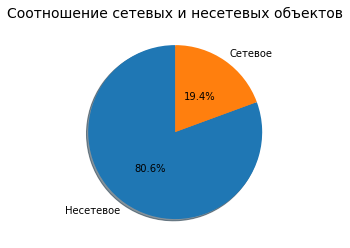

In [25]:
# Визуализируем данные доли помощью plotly круговую диаграмму диаграмму методом pie()
chain = data.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False)
labels = chain['chain']
fig1, ax1 = plt.subplots()
ax1.pie(chain['id'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.5)
plt.title("Соотношение сетевых и несетевых объектов", fontsize=14);

Превалируют несетевые объекты (12317) примерно в четыре раза, сетевых всего 2964 (19.4%).

#### Для какого вида объекта общественного питания характерно сетевое распространение?

In [26]:
# Cетевое распределение выведим с помощью plotly expressчерез столбчатую диаграмму методом bar()
grouped_chain = data.pivot_table(values = 'object_name', index='object_type', columns=['chain'], aggfunc='count').reset_index()

grouped_chain['ratio'] = grouped_chain['Сетевое']/(grouped_chain['Сетевое']+grouped_chain['Несетевое'])

#grouped_chain['ratio'].plot(kind='bar')

fig_3 = px.bar(grouped_chain.sort_values(by='ratio', ascending=False),
                y='ratio',
                x='object_type',
                color_discrete_sequence =['#f4a460']*len(grouped_chain),
                title='Доля сетевых заведений по типам заведений',
                labels={'ratio':'Доля сетевых заведений', 'object_type':'Тип объекта'})

fig_3.show()

Сетевое распространение более всего характерно для предприятий быстрого обслуживания (0.41), магазинов с отделом кулинарии (0.28) и ресторанов (0.23)

In [27]:
data

id             object_name      chain object_type  \
0      151635                 сметана  Несетевое        кафе   
1       77874                  родник  Несетевое        кафе   
2       24309         кафе «академия»  Несетевое        кафе   
3       21894              пиццетория    Сетевое        кафе   
4      119365  кафе «вишневая метель»  Несетевое        кафе   
...       ...                     ...        ...         ...   
15361  208537             шоколадница    Сетевое        кафе   
15362  209264             шоколадница    Сетевое        кафе   
15363  209186             шоколадница    Сетевое        кафе   
15364  221900             шоколадница    Сетевое        кафе   
15365  222535             шоколадница    Сетевое        кафе   

                                                 address  number  
0             город москва, улица егора абакумова, дом 9      48  
1      город москва, улица талалихина, дом 2/1, корпус 1      35  
2              город москва, абельмановская улица, дом 6      95  
3                город москва, абрамцевская улица, дом 1      40  
4      город москва, абрамцевская улица, дом 9, корпус 1      50  
...                                                  ...     ...  
15361       город москва, 3-й крутицкий переулок, дом 18      50  
15362           город москва, улица земляной вал, дом 33      10  
15363           город москва, улица земляной вал, дом 33      20  
15364  город москва, поселение московский, киевское ш...      36  
15365             город москва, ходынский бульвар, дом 4      10  

[15281 rows x 6 columns]

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [28]:
#сделаем срез по сетевым заведениям:
fig4 = data.loc[data['chain'] == 'Сетевое']

fig4 = fig4.pivot_table(index='object_name', values='number',\
                        aggfunc= ['count', 'mean']).reset_index() 

fig4.sort_values(by=('count','number'), ascending=False)

object_name  count       mean
                                   number     number
563                    шоколадница    157  57.184713
25                             kfc    155  55.341935
330                     макдоналдс    150  87.700000
109                    бургер кинг    137  46.649635
521                        теремок     94  25.606383
..                             ...    ...        ...
243           кафе «хлеб насущный»      1  38.000000
241  кафе «урюк» хивинская чайхона      1  50.000000
240                 кафе «торнадо»      1  80.000000
237                  кафе «тапчан»      1  70.000000
288           кофе с собой gate 42      1   4.000000

[577 rows x 3 columns]

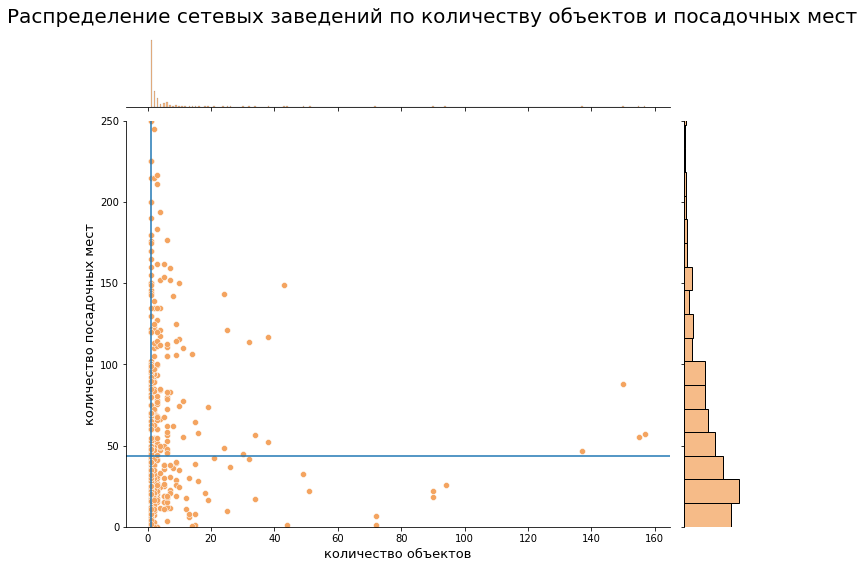

In [29]:
#построим два распределения на одном графике
g=sns.jointplot(x=('count','number'), y=('mean','number'), data=fig4, color='#f4a460',kind='scatter')
g.fig.set_figwidth(10)
g.fig.set_figheight(8)
g.fig.suptitle('Распределение сетевых заведений по количеству объектов и посадочных мест', fontsize=20)
g.set_axis_labels('количество объектов', 'количество посадочных мест', fontsize=13 )
g.fig.tight_layout()
#g.fig.axvline(x=chain_objects_seats.count.median())
#g.fig.axhline(y=chain_objects_seats.mean.median())
g.ax_joint.axvline(x=fig4['count'].median().item(), label="Медианное число объектов")
g.ax_joint.axhline(y=fig4['mean'].median().item(), label="Медианное количество посадочных мест")
plt.xlim(0,200)
plt.ylim(0,250)
plt.show()

В выборке преобладают заведения с небольшим числом объектов (до 10) и небольшим количеством посадочных мест (20-50). Заведения с большим количеством объектов обладают небольшой вместимостью (40-70 мест)

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [30]:
# Сделаем необходимый срез данных
avg_number = data.pivot_table(index='object_type', values='number',\
                        aggfunc= ['mean']).reset_index().sort_values(by=('mean','number'), ascending=False)
avg_number

object_type        mean
                                          number
8                           столовая  130.337848
7                           ресторан   96.884750
1                              буфет   51.425347
0                                бар   43.533333
3                               кафе   39.785703
6  предприятие быстрого обслуживания   20.808645
4                          кафетерий    9.184810
2                         закусочная    7.847701
5          магазин (отдел кулинарии)    5.589744

Самое большое количество посадочных мест в среднем у столовых(130), ресторанов (97), буфетов (51) и баров (43). 

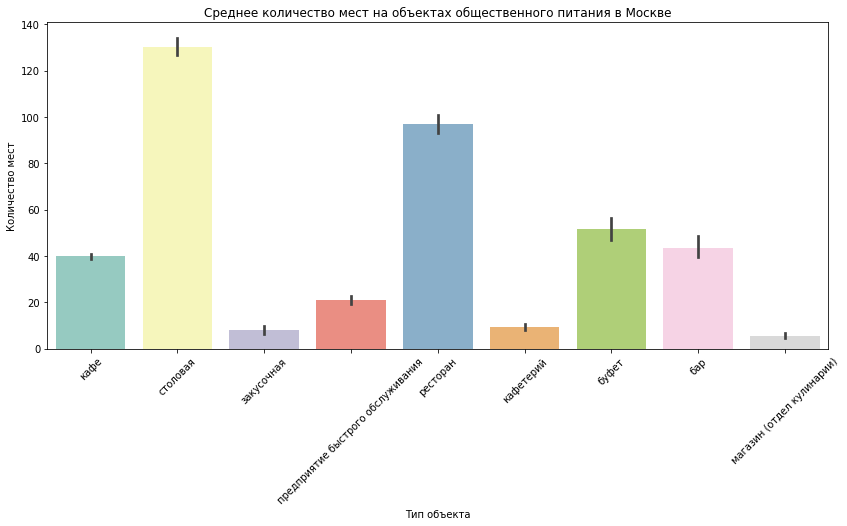

In [31]:
# Построем график данных категорий через seaborn методом boxplot()
plt.figure(figsize=(14,6))
fig5 = sns.barplot(x='object_type', y='number', data=data, palette="Set3", estimator=np.mean)
fig5.set_xlabel('Тип объекта')
fig5.set_ylabel('Количество мест')
fig5.set_title('Среднее количество мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

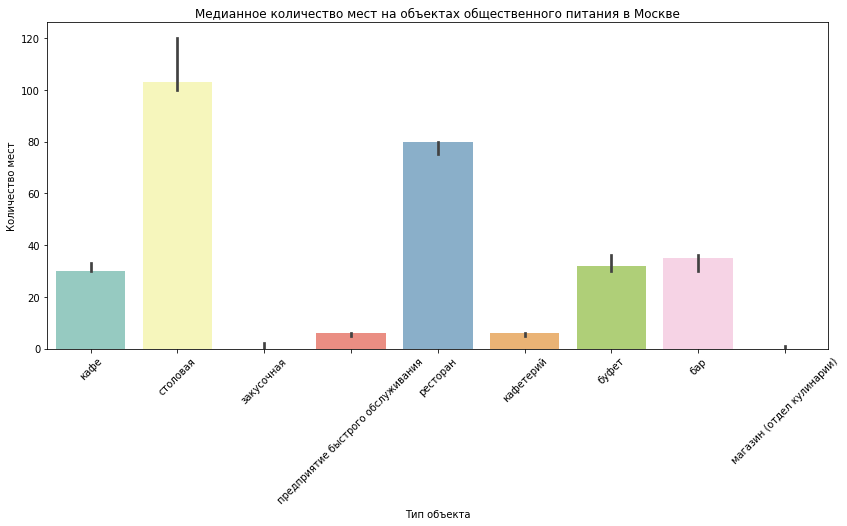

In [32]:
# Посмотрим на медианные значения  данных категорий через seaborn методом boxplot()
plt.figure(figsize=(14,6))
fig5 = sns.barplot(x='object_type', y='number', data=data, palette="Set3", estimator=np.median)
fig5.set_xlabel('Тип объекта')
fig5.set_ylabel('Количество мест')
fig5.set_title('Медианное количество мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

В целом, картина схожа. Больше всего посадочных мест у столовых и ресторанов, буфеты и бары примерно на одном уровне (32-35), за ними следуют кафе (30).

#### Выделите в отдельный столбец информацию об улице из столбца address 

In [33]:
#посмотрим на леммы и их частотность, вытащим оттуда всё, что имеет отношение к улицам
m = Mystem() 
addresses = ' '.join(data['address'].unique())
lemmas = m.lemmatize(addresses)

words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'просек']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=re.I)

data

id             object_name      chain object_type  \
0      151635                 сметана  Несетевое        кафе   
1       77874                  родник  Несетевое        кафе   
2       24309         кафе «академия»  Несетевое        кафе   
3       21894              пиццетория    Сетевое        кафе   
4      119365  кафе «вишневая метель»  Несетевое        кафе   
...       ...                     ...        ...         ...   
15361  208537             шоколадница    Сетевое        кафе   
15362  209264             шоколадница    Сетевое        кафе   
15363  209186             шоколадница    Сетевое        кафе   
15364  221900             шоколадница    Сетевое        кафе   
15365  222535             шоколадница    Сетевое        кафе   

                                                 address  number  \
0             город москва, улица егора абакумова, дом 9      48   
1      город москва, улица талалихина, дом 2/1, корпус 1      35   
2              город москва, абельмановская улица, дом 6      95   
3                город москва, абрамцевская улица, дом 1      40   
4      город москва, абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15361       город москва, 3-й крутицкий переулок, дом 18      50   
15362           город москва, улица земляной вал, дом 33      10   
15363           город москва, улица земляной вал, дом 33      20   
15364  город москва, поселение московский, киевское ш...      36   
15365             город москва, ходынский бульвар, дом 4      10   

                       street  
0       улица егора абакумова  
1            улица талалихина  
2        абельмановская улица  
3          абрамцевская улица  
4          абрамцевская улица  
...                       ...  
15361  3-й крутицкий переулок  
15362      улица земляной вал  
15363      улица земляной вал  
15364          киевское шоссе  
15365       ходынский бульвар  

[15281 rows x 7 columns]

#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [34]:
# Cгруппируем по имени населенного пункта, сортируем и берем первые 10
str_10 = data.groupby('street').count().sort_values(by='id', ascending=False).head(10)
#сохраняем список топ-10
top10streets = str_10.index[:10].to_list()
top10streets

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

In [35]:
# Построим график с помощью plotly expressчерез столбчатую диаграмму методом bar()
fig_6 = px.bar(str_10.reset_index(),
                y='id',
                x='street',
                text='id',
                color_discrete_sequence =['#f4a460']*len(str_10.reset_index()),
                title='Топ-10 улиц по количеству объектов общественного питания',
                labels={'id':'Количество объектов', 'street':'Улица'})
fig_6.show()

Больше всего объектов общественного питания находится на улице Мира (203). Далее по количеству объектов идут Профсоюзная улица(181) и Ленинградский проспект(170). Чуть отстает по количеству объектов Пресненская набережная(167).

Топ-10 - это самые длинные улицы в большинстве своем, а не нагруженные центральные.

*Нужно посмотреть, в каких районах Москвы находятся эти улицы.*

In [36]:
#Создадим фрейм с адресами всех объектов на этих топ 10 улиц
district_10 = data.query('street in @top10streets')
district_10

id              object_name      chain  \
151    155973          кафе «андерсон»    Сетевое   
152     23618            кафе «subway»    Сетевое   
153    155852           кафе «ламаджо»  Несетевое   
154    152556            шаурма в пите  Несетевое   
155    120658                  выпечка  Несетевое   
...       ...                      ...        ...   
15308  213629               додо пицца    Сетевое   
15325  198436                    милти    Сетевое   
15347  222491  кальянная «мята lounge»    Сетевое   
15350  213061                     мята    Сетевое   
15358  213724              шоколадница    Сетевое   

                             object_type  \
151                                 кафе   
152                                 кафе   
153                                 кафе   
154    предприятие быстрого обслуживания   
155                            кафетерий   
...                                  ...   
15308                               кафе   
15325  предприятие быстрого обслуживания   
15347                               кафе   
15350                          кафетерий   
15358                               кафе   

                                                 address  number  \
151                город москва, варшавское шоссе, дом 2     150   
152      город москва, варшавское шоссе, дом 7, корпус 1      36   
153               город москва, варшавское шоссе, дом 29      30   
154     город москва, варшавское шоссе, дом 72, корпус 2       0   
155              город москва, варшавское шоссе, дом 100       2   
...                                                  ...     ...   
15308       город москва, пресненская набережная, дом 12      25   
15325  город москва, ленинградский проспект, дом 80, ...       0   
15347  город москва, профсоюзная улица, дом 142, корп...      40   
15350    город москва, каширское шоссе, дом 96, корпус 1      35   
15358            город москва, варшавское шоссе, дом 87б      54   

                       street  
151          варшавское шоссе  
152          варшавское шоссе  
153          варшавское шоссе  
154          варшавское шоссе  
155          варшавское шоссе  
...                       ...  
15308  пресненская набережная  
15325  ленинградский проспект  
15347       профсоюзная улица  
15350         каширское шоссе  
15358        варшавское шоссе  

[1493 rows x 7 columns]

In [37]:
# Возьмем адреса из колонки address и смотрим район с помощью внешней библиотеки geocoder. Чтобы не проделывать это еще раз, я закомментировала код, но оставила его для ознакомления. Полученный датасет "district_10" загрузила на облако и подгрузила с помощью "pd.read_csv".

# result = []
# result_location_lat = []
# result_location_lng = []

# for index, row in district_10.iterrows():
#     URL = 'https://maps.googleapis.com/maps/api/geocode/json'
#     params = { # словарь с параметрами запроса
#         'address' : row['address'],
#         'key' : 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
#     }
#     response = requests.get(URL, params=params)
#     response_parsed = json.loads(response.text)
#     for i in response_parsed['results'][0]['address_components']:
#         if i['types'] == ['administrative_area_level_3', 'political']:
#             a = i['long_name']
#             break
#     if a != '':
#         result.append(a)
#     else:
#         result.append('')
#     result_location_lat.append(response_parsed['results'][0]['geometry']['location']['lat'])
#     result_location_lng.append(response_parsed['results'][0]['geometry']['location']['lng'])

# district_10["district"] = result   
# district_10['location_lat'] = result_location_lat
# district_10['location_lng'] = result_location_lng


#district_10.to_csv('district10.csv', index=False)

In [38]:
url = 'https://docs.google.com/spreadsheets/d/1peiSVcT0EB-fGg7yoLg6-R-v1YK7Y6x-GzWqG2tBI38/edit?usp=sharing'
url.split('/')
id = url.split('/')[5]
district_10 = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
district_10

id              object_name      chain  \
0     155973          кафе «андерсон»    Сетевое   
1      23618            кафе «subway»    Сетевое   
2     155852           кафе «ламаджо»  Несетевое   
3     152556            шаурма в пите  Несетевое   
4     120658                  выпечка  Несетевое   
...      ...                      ...        ...   
1488  213629               додо пицца    Сетевое   
1489  198436                    милти    Сетевое   
1490  222491  кальянная «мята lounge»    Сетевое   
1491  213061                     мята    Сетевое   
1492  213724              шоколадница    Сетевое   

                            object_type  \
0                                  кафе   
1                                  кафе   
2                                  кафе   
3     предприятие быстрого обслуживания   
4                             кафетерий   
...                                 ...   
1488                               кафе   
1489  предприятие быстрого обслуживания   
1490                               кафе   
1491                          кафетерий   
1492                               кафе   

                                                address  number  \
0                 город москва, варшавское шоссе, дом 2     150   
1       город москва, варшавское шоссе, дом 7, корпус 1      36   
2                город москва, варшавское шоссе, дом 29      30   
3      город москва, варшавское шоссе, дом 72, корпус 2       0   
4               город москва, варшавское шоссе, дом 100       2   
...                                                 ...     ...   
1488       город москва, пресненская набережная, дом 12      25   
1489  город москва, ленинградский проспект, дом 80, ...       0   
1490  город москва, профсоюзная улица, дом 142, корп...      40   
1491    город москва, каширское шоссе, дом 96, корпус 1      35   
1492            город москва, варшавское шоссе, дом 87б      54   

                      street                     district  location_lat  \
0           варшавское шоссе                      Donskoy     55.699949   
1           варшавское шоссе                      Donskoy     55.700888   
2           варшавское шоссе                      Donskoy     55.693228   
3           варшавское шоссе                     Nagornyy     55.656813   
4           варшавское шоссе                     Nagornyy     55.645996   
...                      ...                          ...           ...   
1488  пресненская набережная                  Presnenskiy     55.749882   
1489  ленинградский проспект                        Sokol     55.808108   
1490       профсоюзная улица                  Teplyy Stan     55.625528   
1491         каширское шоссе  Orekhovo-Borisovo Severnoye     55.614938   
1492        варшавское шоссе                     Nagornyy     55.653544   

      location_lng  
0        37.619977  
1        37.622402  
2        37.622091  
3        37.618777  
4        37.618902  
...            ...  
1488     37.537864  
1489     37.510818  
1490     37.509222  
1491     37.712319  
1492     37.620833  

[1493 rows x 10 columns]

In [39]:
# Посчитаем число уникальных районов в которых находятся топ-10 улиц по количеству объектов общественного питания
district_10['district'].nunique()

37

In [40]:
# Построим график с помощью plotly express построим столбчатую диаграмму методом bar()
fig_7 = px.bar(district_10.groupby('district').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='district',
                text='id',
                color_discrete_sequence =['#f4a460']*len(district_10.groupby('district').count().reset_index().sort_values(by='id', ascending=False)),
                title='Количество объектов по районам',
                labels={'district':'Район', 'id':'Количество'}
               )
fig_7.update_xaxes(tickangle=45)
fig_7.show()

Больше всего заведений оказалось в Пресненском районе (167). Он расположен в Центральном административном округе, в северо-западной его части. На территории района имеется значительное количество заводов и фабрик, Дом Правительства РФ, крупные деловые комплексы (Москва-Сити, Центр международной торговли).

В районе Чертаново Центральное находится 90 заведений из списка "Топ-10 улиц". Он расположен в Южном административном округе.

Далее следует район Тропарево-Никулино (84 объекта), расположенный на территории Западного административного округа.

In [41]:
street10_locations = district_10[["location_lat", "location_lng", "object_name"]]

In [42]:
import folium

In [43]:
map = folium.Map(
    width=1000,
    height=1000,
    location=[street10_locations.location_lat.mean(), street10_locations.location_lng.mean()],
    zoom_start=14, control_scale=True)
map

In [44]:
for index, location_info in street10_locations.iterrows():
    folium.Marker([location_info["location_lat"], location_info["location_lng"]], popup=location_info["object_name"]).add_to(map)
map

Make this Notebook Trusted to load map: File -> Trust Notebook
Видим, что распределение по районам связано с протяженностью улиц. Восточный административный округ оказался обделен улицами с больщим количеством объектов питания - возможно, улицы там не такие длинные, как в других округах. Видим много объектов - это:

- Центральном административном округе (Пресненский район, Мещанский),
- Южном административном округе (Нагорный район, Чертаново Южное, Донской),
- Юго-Западном административном округе (Обручевский, Черемушки, Теплый Стан, Гагаринский),
- Западном административном округе (Тропарево-Никулино, Дорогомилово, Фили-Давыдково, Раменки),
- Северном (Хорошевский, Беговой район, Войковский, Аэропорт, Сокол)
- Северо-Восточном административном округе (Свиблово, Алексеевский).

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [45]:
data.head()

id             object_name      chain object_type  \
0  151635                 сметана  Несетевое        кафе   
1   77874                  родник  Несетевое        кафе   
2   24309         кафе «академия»  Несетевое        кафе   
3   21894              пиццетория    Сетевое        кафе   
4  119365  кафе «вишневая метель»  Несетевое        кафе   

                                             address  number  \
0         город москва, улица егора абакумова, дом 9      48   
1  город москва, улица талалихина, дом 2/1, корпус 1      35   
2          город москва, абельмановская улица, дом 6      95   
3            город москва, абрамцевская улица, дом 1      40   
4  город москва, абрамцевская улица, дом 9, корпус 1      50   

                  street  
0  улица егора абакумова  
1       улица талалихина  
2   абельмановская улица  
3     абрамцевская улица  
4     абрамцевская улица

In [46]:
# Посмотрим сколько dсего в данных улиц с одним объектом общественного питания
rest_1 = data.groupby('street').count().sort_values(by='id', ascending=True)
rest_1_streets = rest_1[rest_1['id'] == 1].index.to_list()
len(rest_1_streets)

555

In [47]:
#Создадим фрейм с адресами всех объектов на этих топ 10 улиц и посмотрим на районы, в которых находятся такие объекты.
rest_1_data = data.query('street in @rest_1_streets')
rest_1_data

id                        object_name      chain  \
19     153644  американская лаборатория десертов  Несетевое   
61      21214                           столовая  Несетевое   
69      22139                             хуанхэ  Несетевое   
81      25833                        азербайджан  Несетевое   
131    150881                               вгик  Несетевое   
...       ...                                ...        ...   
14440  211368                        пацио пицца  Несетевое   
14704  214324                 кадаши ( закрытый)  Несетевое   
14798  223171      кондитерская «пряник.рогалик»  Несетевое   
14974  213930                       горячий хлеб  Несетевое   
15017  205588                            кофейня  Несетевое   

                             object_type  \
19                                  кафе   
61                              столовая   
69                              ресторан   
81                              ресторан   
131                             столовая   
...                                  ...   
14440                               кафе   
14704                           ресторан   
14798                               кафе   
14974  предприятие быстрого обслуживания   
15017                          кафетерий   

                                                 address  number  \
19         город москва, филипповский переулок, дом 15/5      20   
61                 город москва, бабаевская улица, дом 3      90   
69       город москва, 1-й балтийский переулок, дом 3/25      60   
81            город москва, улица демьяна бедного, дом 4     180   
131                 город москва, будайская улица, дом 3      45   
...                                                  ...     ...   
14440  город москва, улица линии октябрьской железной...      20   
14704  город москва, 2-й кадашёвский переулок, дом 16...      15   
14798  город москва, город троицк, пионерская улица, ...      20   
14974  город москва, поселение десеновское, улица дми...       0   
15017  город москва, поселение щаповское, улица евген...      16   

                                        street  
19                       филипповский переулок  
61                            бабаевская улица  
69                     1-й балтийский переулок  
81                       улица демьяна бедного  
131                            будайская улица  
...                                        ...  
14440  улица линии октябрьской железной дороги  
14704                 2-й кадашёвский переулок  
14798                         пионерская улица  
14974                  улица дмитрия рябинкина  
15017                  улица евгения родионова  

[555 rows x 7 columns]

In [48]:
# Посмотрим район с помощью внешней библиотеки geocoder. Чтобы не проделывать это еще раз, я закомментировала код, но оставила его для ознакомления. Полученный датасет "rest_1_data" загрузила на облако и подгрузила с помощью "pd.read_csv".

# result = []

# result_location_lat = []

# result_location_lng = []

# for index, row in rest_1_data.iterrows():
#     URL = 'https://maps.googleapis.com/maps/api/geocode/json'
#     params = { # словарь с параметрами запроса
#         'address' : row['address'],
#         'key' : 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
#     }
#     response = requests.get(URL, params=params)
#     response_parsed = json.loads(response.text)
#     for i in response_parsed['results'][0]['address_components']:
#         if i['types'] == ['administrative_area_level_3', 'political']:
#             a = i['long_name']
#             break
#     if a != '':
#         result.append(a)
#     else:
#         result.append('')
#     result_location_lat.append(response_parsed['results'][0]['geometry']['location']['lat'])
#     result_location_lng.append(response_parsed['results'][0]['geometry']['location']['lng'])

# rest_1_data["district"] = result   
# rest_1_data['location_lat'] = result_location_lat
# rest_1_data['location_lng'] = result_location_lng
# rest_1_data

# rest_1_data.to_csv('rest_1_data.csv', index=False)

In [49]:
url = 'https://docs.google.com/spreadsheets/d/1w4hPDqCSh0yrE0Ws79EFP2bkUnAgArid401l_p58wkQ/edit?usp=sharing'
url.split('/')
id = url.split('/')[5]
rest_1_data = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
rest_1_data

id                        object_name      chain  \
0    153644  американская лаборатория десертов  Несетевое   
1     21214                           столовая  Несетевое   
2     22139                             хуанхэ  Несетевое   
3     25833                        азербайджан  Несетевое   
4    150881                               вгик  Несетевое   
..      ...                                ...        ...   
550  211368                        пацио пицца  Несетевое   
551  214324                 кадаши ( закрытый)  Несетевое   
552  223171      кондитерская «пряник.рогалик»  Несетевое   
553  213930                       горячий хлеб  Несетевое   
554  205588                            кофейня  Несетевое   

                           object_type  \
0                                 кафе   
1                             столовая   
2                             ресторан   
3                             ресторан   
4                             столовая   
..                                 ...   
550                               кафе   
551                           ресторан   
552                               кафе   
553  предприятие быстрого обслуживания   
554                          кафетерий   

                                               address  number  \
0        город москва, филипповский переулок, дом 15/5      20   
1                город москва, бабаевская улица, дом 3      90   
2      город москва, 1-й балтийский переулок, дом 3/25      60   
3           город москва, улица демьяна бедного, дом 4     180   
4                 город москва, будайская улица, дом 3      45   
..                                                 ...     ...   
550  город москва, улица линии октябрьской железной...      20   
551  город москва, 2-й кадашёвский переулок, дом 16...      15   
552  город москва, город троицк, пионерская улица, ...      20   
553  город москва, поселение десеновское, улица дми...       0   
554  город москва, поселение щаповское, улица евген...      16   

                                      street                   district  \
0                      филипповский переулок                      Arbat   
1                           бабаевская улица                 Sokol'niki   
2                    1-й балтийский переулок                   Aeroport   
3                      улица демьяна бедного        Khoroshevo-Mnevniki   
4                            будайская улица                  Rostokino   
..                                       ...                        ...   
550  улица линии октябрьской железной дороги             Timiryazevskiy   
551                 2-й кадашёвский переулок                  Yakimanka   
552                         пионерская улица                    Troitsk   
553                  улица дмитрия рябинкина   Desenovskoye, Poseleniye   
554                  улица евгения родионова  Shchapovskoye, Poseleniye   

     location_lat  location_lng  
0       55.750636     37.598370  
1       55.790725     37.688995  
2       55.810465     37.518729  
3       55.769880     37.486934  
4       55.832015     37.665194  
..            ...           ...  
550     55.838810     37.572088  
551     55.743794     37.621970  
552     55.475975     37.305527  
553     55.502440     37.332568  
554     55.380702     37.402330  

[555 rows x 10 columns]

In [50]:
# Постороим график по количеству улиц с одним объектом общественного питания по районам посредством plotly express методом bar()
fig_8 = px.bar(rest_1_data.groupby('district').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='district',
                text='id',
                color_discrete_sequence =['#f4a460']*len(rest_1_data.groupby('district').count().reset_index().sort_values(by='id', ascending=False)),
                title='Количество улиц с одним объектом общественного питания по районам',
                labels={'district':'Район', 'id':'Количество'}
               )
fig_8.update_xaxes(tickangle=45)
fig_8.show()

В Таганском районе больше всего улиц с одним объектом общественного питания (28). В Тверском, Сокольниках и Лефортово тоже немало улиц, где всего 1 заведение (26, 22, 21 соответственно). Следует обратить на них внимание. Например, Таганский район расположен в Центральном административном округе, там развитая инфраструктура, много деловых центров.

In [51]:
# создадим необходимую библиотеку
rest1_locations = rest_1_data[["location_lat", "location_lng", "object_name"]]
rest1_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location_lat  555 non-null    float64
 1   location_lng  555 non-null    float64
 2   object_name   555 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.1+ KB


In [52]:
map = folium.Map(
    location=[rest1_locations.location_lat.mean(), rest1_locations.location_lng.mean()],
    zoom_start=14, control_scale=True)
map

In [53]:
for index, location_info in rest1_locations.iterrows():
    folium.Marker([location_info["location_lat"], location_info["location_lng"]], popup=location_info["object_name"]).add_to(map)
map

Улицы с одним объектом общественного питания распределены по всей Москве, в центре их больше, к окраинам число убывает.

#### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

Для того, чтобы сделайть общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Проведем необходимые вычисления по нахождению наиболее актуального числа посадочных мест.

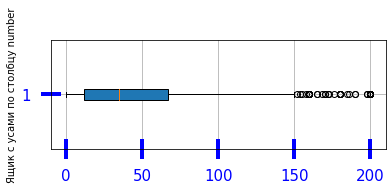

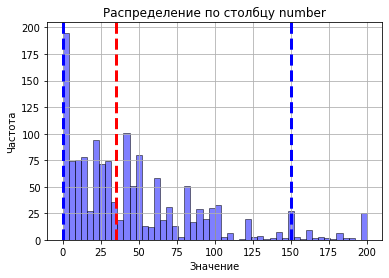

In [54]:
#Напишем функцию, которая будет определять, на какое количество корзин стоит разбивать график. Для просмотра распределения построим гистограмму и "ящик с усами".
def set_bins(df, value):    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20
def create_hist(df, col):
    coef_bins = 0.005
    a = df.loc[(df[col] >= df[col].quantile(.05))&(df[col] <= df[col].quantile(.95)), col]
    plt.figure(figsize =(6, 2))
    plt.boxplot(a,  
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
    plt.ylabel('Ящик с усами по столбцу ' + col)
    plt.tick_params(axis = 'both',   
               which = 'major',    
               direction = 'inout',    
               length = 20,    
               width = 4,     
               color = 'b',    
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'b'    
             )    
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    hist = a.plot(
                kind='hist', 
                bins=set_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='blue',
                )
    plt.axvline(x=a.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
    plt.axvline(x=a.quantile(.05),
                linewidth=3, 
                color='b', 
                linestyle='--')
    plt.axvline(x=a.quantile(.95),
                linewidth=3, 
                color='b', 
                linestyle='--')
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
create_hist(district_10, 'number')  

In [55]:
# Посмотрим на данные распределения посредством describe
district_10['number'].describe()

count    1493.000000
mean       58.219022
std        90.183093
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания - 49, медианное значение - 30. Есть выбросы в районе 0, скорее всего, присутствуют точки без посадочных мест и работающие на вынос. Преобладают завдения с небольшим количеством мест (10-50), объектов на большее число мест (60-120) в выгрузке меньше.

In [56]:
# Построим распределение количества посадочных мест по улицам с большим количеством объектов общественного питания посредством plotly express методом histogram()
fig9 = px.histogram(
    district_10.loc[(district_10['number'] >= district_10['number'].quantile(.05))&(district_10['number'] <= district_10['number'].quantile(.95))], 
    x="number", 
    color='street',
    marginal="box",
    nbins=50,
    labels={'x':'Число посадочных мест', 'y':'Частота'},
    title='Распределение количества посадочных мест по улицам'
)
fig9.show()

На проспекте Мира самое большое медианное значение числа посадочных мест - 44; на Кутузовском, Ленинградском и Ленинском проспектах - 35-40. На Профсоюзной улице распространены объекты с меньшим числом посадочных мест - медианное значение равно 24. На Варшавском, Кировоградской и Пресненской набережной похожая ситуация - медианное чило посадочных мест равно 24-26.

**ОБЩИЙ ВЫВОД**

**1.** Исследовано соотношение видов объектов общественного питания по количеству.

Больше всего в выгрузке записей о кафе (6071), далее идут столовые(2584), рестораны(2282) и предприятия быстрого обслуживания(1897).

**2.** Исследовано соотношение сетевых и несетевых заведений по количеству. 

Превалируют несетевые объекты (12317) примерно в четыре раза, сетевых всего 2964 (19.4%).

**3.** Изучено, для какого вида объекта общественного питания характерно сетевое распространение.

Сетевое распространение более всего характерно для предприятий быстрого обслуживания (0.41), магазинов с отделом кулинарии (0.28) и ресторанов (0.23)

**4.** Исследовано, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

В выборке преобладают заведения с небольшим числом объектов (до 10) и небольшим количеством посадочных мест (20-50). Заведения с большим количеством объектов обладают небольшой вместимостью (40-70 мест).

**5.** Для каждого вида объекта общественного питания описано среднее количество посадочных мест. 

Самое большое количество посадочных мест в среднем у столовых(130), ресторанов (97), буфетов (51) и баров (43).
Изучены также медианные значения посадочных мест - по ним, в целом, картина схожа. Больше всего посадочных мест у столовых и ресторанов, буфеты и бары примерно на одном уровне (32- 35), за ними следуют кафе (30).

**6.** Выделена в отдельный столбец информация об улице из столбца address.

Для этого были использованы лемматизация и регулярные выражения.

**7.** Построен график топ-10 улиц по количеству объектов общественного питания. 

Больше всего объектов общественного питания находится на улице Мира (203). Далее по количеству объектов идут Профсоюзная улица(181) и Ленинградский проспект(170). Чуть отстает по количеству объектов Пресненская набережная(167).
Топ-10 - это самые длинные улицы в большинстве своем, а не нагруженные центральные.

С помощью внешней информации определено, в каких районах Москвы находятся эти улицы.
Получили 38 районов, в которых находятся топ-10 улиц по количеству объектов общественного питания.

Больше всего заведений оказалось в Пресненском районе (167). Он расположен в Центральном административном округе, в северо-западной его части. На территории района имеется значительное количество заводов и фабрик, Дом Правительства РФ, крупные деловые комплексы (Москва-Сити, Центр международной торговли). 

В районе Чертаново Центральное находится 90 заведений из списка "Топ-10 улиц". Он расположен в Южном административном округе.

Далее следует район Тропарево-Никулино (84 объекта), расположенный на территории Западного административного округа.

Обнаружено, что распределение по районам связано с протяженностью улиц. Восточный административный округ оказался обделен улицами с больщим количеством объектов питания - возможно, улицы там не такие длинные, как в других округах. Замечено много объектов в

- Центральном административном округе (Пресненский район, Мещанский),
- Южном административном округе (Нагорный район, Чертаново Южное, Донской),
- Юго-Западном административном округе (Обручевский, Черемушки, Теплый Стан, Гагаринский),
- Западном административном округе (Тропарево-Никулино, Дорогомилово, Фили-Давыдково, Раменки),
- Северном (Хорошевский, Беговой район, Войковский, Аэропорт, Сокол)
- Северо-Восточном административном округе (Свиблово, Алексеевский).

**8.*** Найдено число улиц с одним объектом общественного питания. 
С помощью внешней информации определено, в каких районах Москвы находятся эти улицы.

Улицы с одним объектом общественного питания распределены по всей Москве, в центре их больше, к окраинам число убывает.
В Таганском районе больше всего улиц с одним объектом общественного питания (28). В Тверском, Сокольниках и Лефортово тоже немало улиц, где всего 1 заведение (26, 22, 21 соответственно). Следует обратить на них внимание. Например, Таганский район расположен в Центральном административном округе, там развитая инфраструктура, много деловых центров, большой поток людей, и объект питания на одной из "одиноких" улиц был бы там очень кстати.

**9.** Изучено распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания - 49, медианное значение - 30. Есть выбросы в районе 0, скорее всего, присутствуют точки без посадочных мест и работающие на вынос. Преобладают завдения с небольшим количеством мест (10-50), объектов на большее число мест (60-120) в выгрузке меньше.

На проспекте Мира самое большое медианное значение числа посадочных мест - 44; на Кутузовском, Ленинградском и Ленинском проспектах - 35-40. На Профсоюзной улице распространены объекты с меньшим числом посадочных мест - медианное значение равно 24. На Варшавском, Кировоградской и Пресненской набережной похожая ситуация - медианное чило посадочных мест равно 24-26.

**С учетом изученной информации и полученных данных, рекомендации для инвесторов могут быть следующие:**

- 1. Вид заведения - кафе, несетевой объект (в чем так же может заключаться его уникальность).
- 2. Количество посадочных мест - 30-40. Это всреднее число подадочных мест для объектов типа "кафе" по городу.
- 3. Район расположения - Таганский. Он расположен в Центральном административном округе, там много деловых центров, большой поток людей, хорошая транспортная доступность. Также в Таганском районе больше всего улиц с одним объектом общественного питания (28), что позволит при меньшей конкуренции претендовать на хорошую посещаемость.
- 4. Возможность развития сети. 

Москва как город-миллионник - это отличная точка старта для нового заведения с оригинальной концепцией, здесь заметен ежегодный рост туристического потока, высокая деловая и событийная активность. При положительной динамике оборота объекта общественного питания можно рассмотреть развитие концепции по системе франчайзинга.

### Шаг №3. Подготовка презентации

*Подготовлена презентация исследования для инвесторов.*

Презентация: <https://1drv.ms/b/s!Al2ooOx0UraVgQAgOrqTtlBDwj1X> 